Index(['country', 'code', 'year', 'protein_per_capita_(g)'], dtype='object')


/tmp/ipykernel_20410/1807571844.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


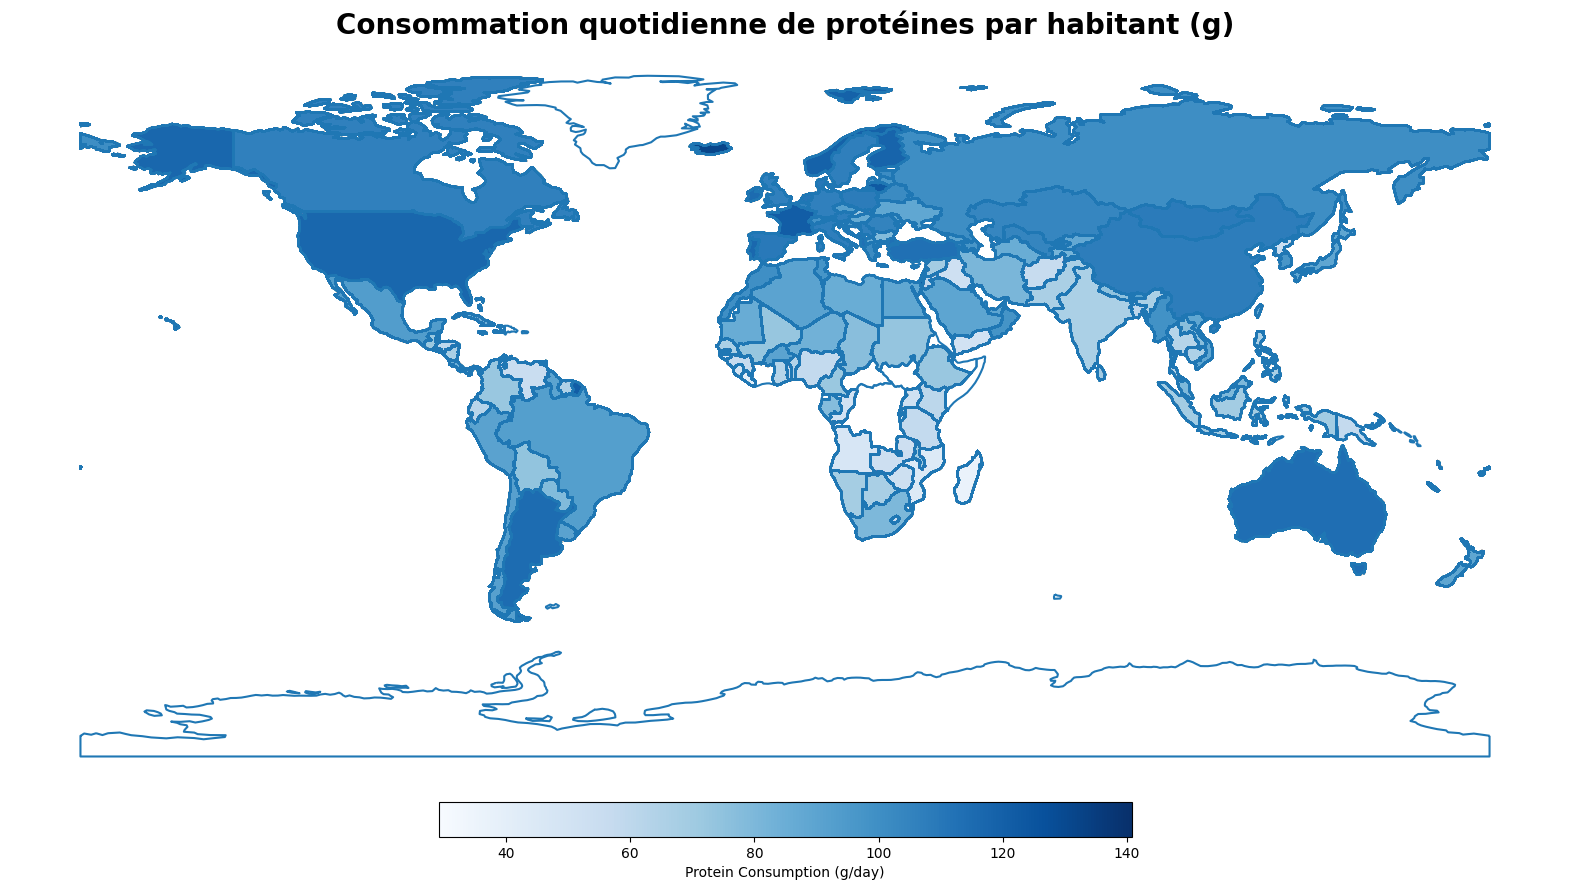

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_world_prot = pd.read_csv("daily-per-capita-protein-supply.csv")

df_world_prot = df_world_prot.rename(columns={'Total': 'protein_per_capita_(g)', 'Code': 'code', 'Year': 'year'})
df_world_prot = df_world_prot.rename(columns={
    'Total | 00002901 || Food available for consumption | 0674pc || grams of protein per day per capita': 'protein_per_capita_(g)',
    'Entity': 'country'})

print(df_world_prot.columns)
# Téléchargez la carte du monde en utilisant geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionnez le DataFrame avec les données sur la carte du monde
world = world.merge(df_world_prot, how='left', left_on='name', right_on='country')

# Créez la heatmap du monde
fig, ax = plt.subplots(1, 1, figsize=(20,15 ))
world.boundary.plot(ax=ax)
world.plot(column='protein_per_capita_(g)', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Protein Consumption (g/day)", 'orientation': "horizontal", 'shrink': 0.8, 'pad': 0.01, 'fraction': 0.03})

# Ajoutez une légende
ax.set_title('Consommation quotidienne de protéines par habitant (g)', fontsize=20, fontweight='bold')
ax.set_axis_off()

plt.show()



In [2]:
# Charger le GeoDataFrame représentant les frontières du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extraire la liste des noms des pays
list_of_countries = world['name'].unique()

# Afficher la liste des noms des pays
print(list_of_countries)


['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

/tmp/ipykernel_20410/2651290576.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


3.Diversité des sources de protéines :

Analysez la variété des sources de protéines disponibles dans chaque région, y compris les produits d'origine animale et végétale.
Identifiez les régions où la diversité des sources de protéines est limitée et discutez des avantages d'une alimentation diversifiée en protéines.

4.Durabilité de la production de protéines :

Explorez l'impact environnemental de la production de protéines, en mettant en évidence les pratiques agricoles et les sources de protéines associées à une empreinte écologique plus faible.
Discutez des défis et des opportunités pour une production de protéines plus durable.

In [3]:
df_prot_world = pd.read_csv("prot_pays2021.csv")
df_prot_world.columns

columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)','Element Code',
       'Element', 'Item Code (FBS)', 'Year Code', 'Flag', 'Flag Description']
df_prot_world = df_prot_world.drop(columns=columns_to_drop)
df_prot_world

,Area,Item,Year,Unit,Value
0,Central African Republic,Wheat and products,2021,g/cap/d,0.82
1,Central African Republic,Rice and products,2021,g/cap/d,0.87
2,Central African Republic,Maize and products,2021,g/cap/d,3.86
3,Central African Republic,Millet and products,2021,g/cap/d,0.38
4,Central African Republic,Sorghum and products,2021,g/cap/d,1.15
...,...,...,...,...,...
65,Sudan,Groundnuts,2021,g/cap/d,2.62
66,Sudan,Bovine Meat,2021,g/cap/d,3.21
67,Sudan,Mutton & Goat Meat,2021,g/cap/d,3.35
68,Sudan,Pigmeat,2021,g/cap/d,0.00


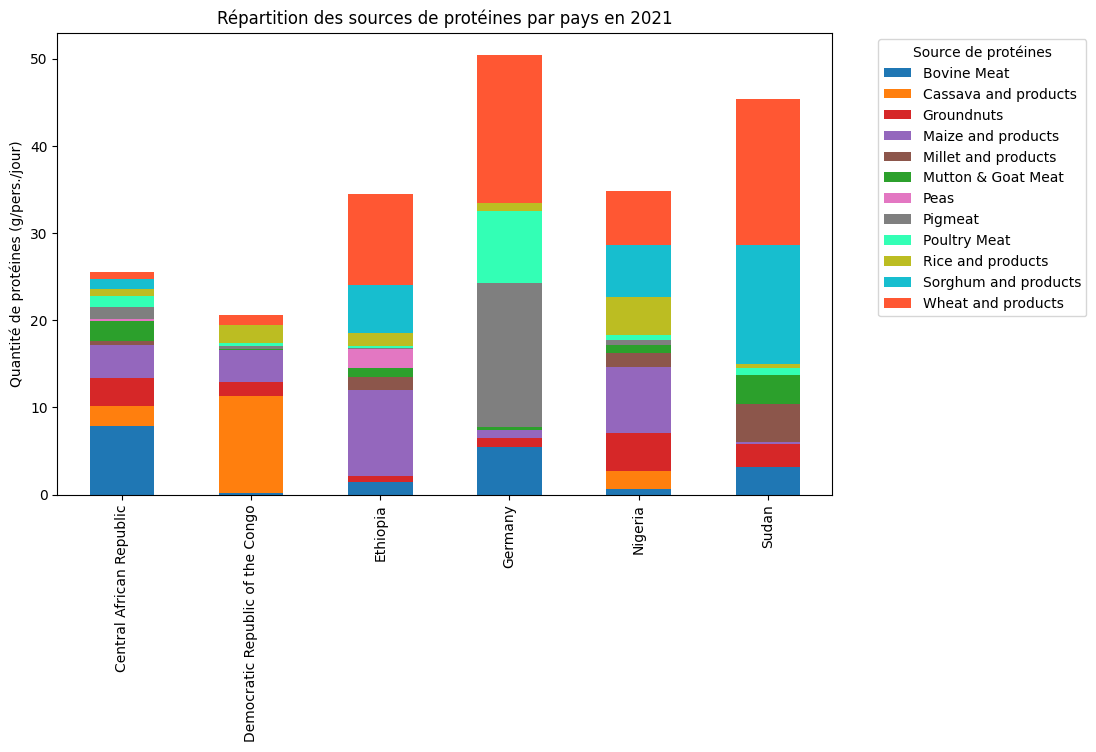

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df soit votre DataFrame
# Remplacez 'df' par le nom réel de votre DataFrame si différent

# Filtrer uniquement les colonnes nécessaires
df_prot_world_filtered = df_prot_world[['Area', 'Item', 'Value']]

# Pivoter le DataFrame pour avoir les protéines comme colonnes
df_pivot = df_prot_world_filtered.pivot(index='Area', columns='Item', values='Value').reset_index()

# Remplacer les valeurs NaN par 0
df_pivot = df_pivot.fillna(0)

custom_palette = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#2ca02c', '#e377c2', '#7f7f7f','#33FFB5', '#bcbd22', '#17becf', '#ff5733']
#custom_palette = plt.cm.get_cmap("tab20", 15)

# Tracer le graphique à barres empilées
ax = df_pivot.plot(kind='bar', stacked=True, x='Area', figsize=(10, 6), color=custom_palette)
plt.title('Répartition des sources de protéines par pays en 2021')
plt.xlabel('')
plt.ylabel('Quantité de protéines (g/pers./jour)')
plt.legend(title='Source de protéines', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.show()